In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("Summer_Olympic.csv", encoding='latin1')

# Clean the data
df = df.drop(['Event_gender', 'Country_Code'], axis=1)
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)

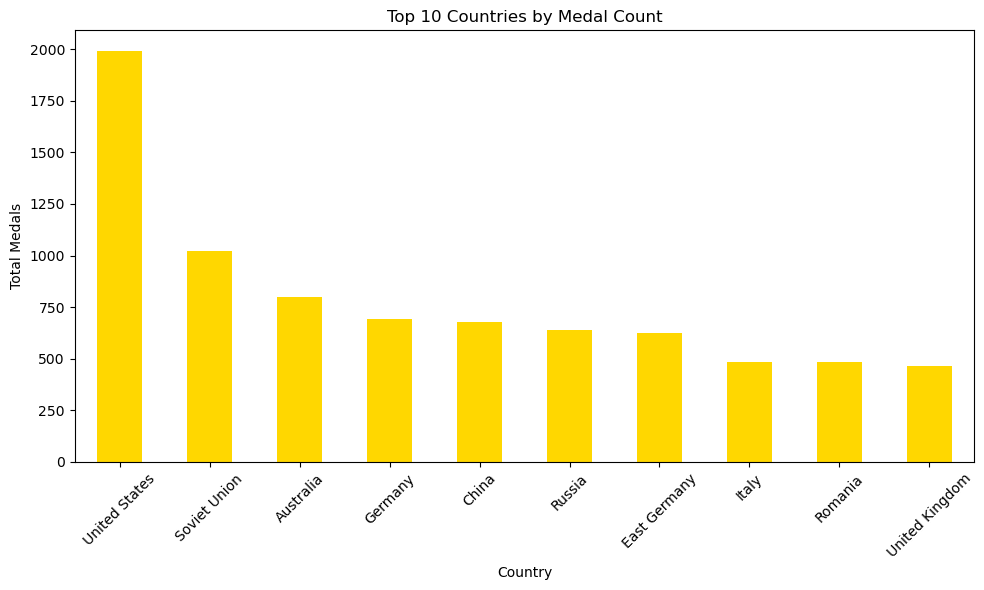

In [4]:
plt.figure(figsize=(10,6))
df['Country'].value_counts().head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Countries by Medal Count")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

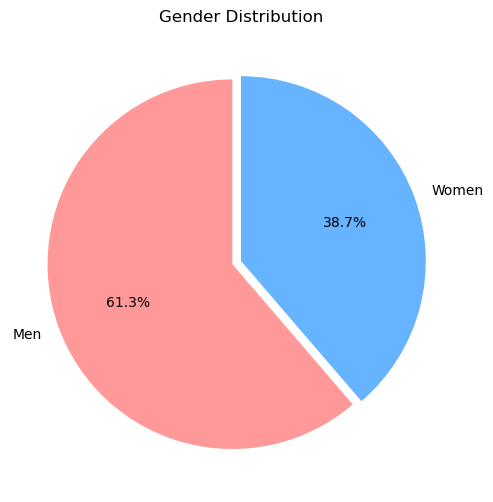

In [5]:
# Gender Distribution
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.05, 0], startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

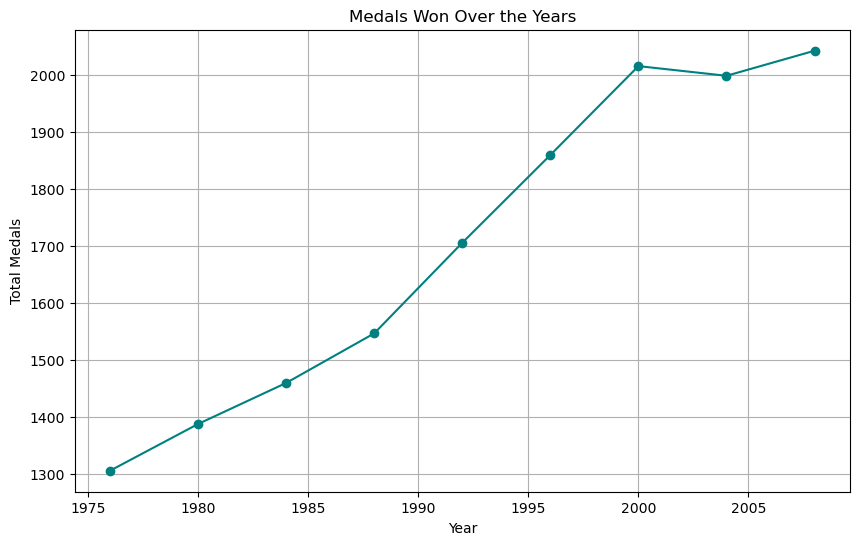

In [6]:
plt.figure(figsize=(10,6))
df.groupby('Year')['Medal'].count().plot(marker='o', linestyle='-', color='teal')
plt.title("Medals Won Over the Years")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

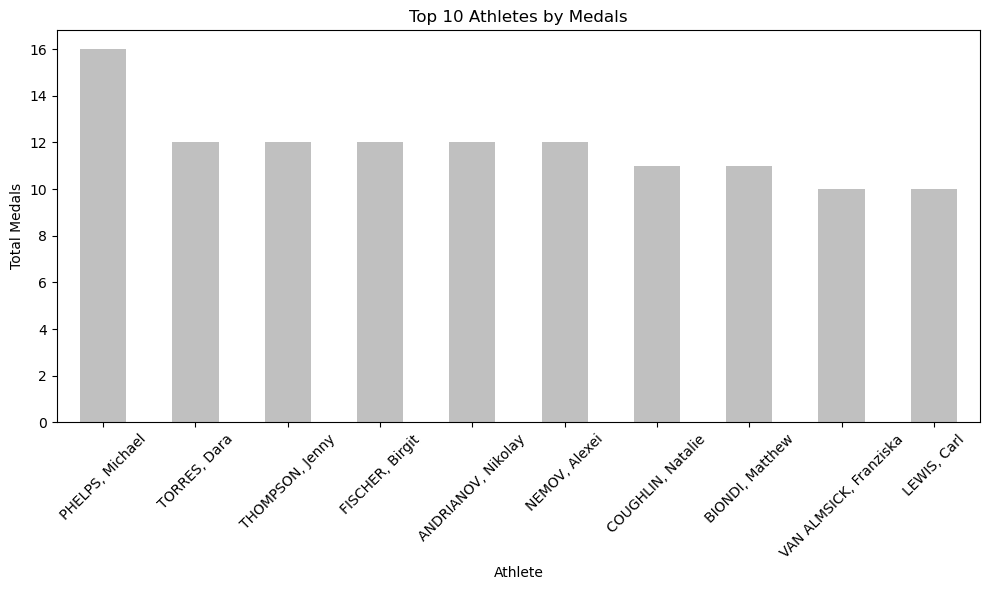

In [7]:
# Top 10 Athletes by Medal Count
plt.figure(figsize=(10,6))
df['Athlete'].value_counts().head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medals")
plt.ylabel("Total Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
le = LabelEncoder()
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])

In [38]:
df['Medal_Binary'] = df['Medal'].map({'Gold': 1, 'Silver': 0, 'Bronze': 0})

In [39]:
X = df[['Sport', 'Gender']]
y = df['Medal_Binary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))